In [87]:
#!pip install seaborn --upgrade

from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(style="ticks")

# load file to analyze
#uploaded = files.upload()
  
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('mall-customers.csv', sep=",")

#параметры модели
customerId = 'CustomerID'           # Unique ID assigned to the customer
gender = 'Gender'                   # Gender of the customer
age = 'Age'                         # Age of the customer
annualIncome = 'Annual Income'      # Annual Income of the customee
customerScore = 'Spending Score'    # Score assigned by the mall based on customer behavior and spending nature

# В качестве целевого признака выберем Annual Income 

# Первые 5 строк датасета
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [88]:
# Размер датасета 
data.shape

(200, 5)

In [89]:
total_count = data.shape[0]
print('data at all: {}'.format(total_count))

data at all: 200


In [90]:
# Список колонок
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [91]:
# Список колонок с типами данных
data.dtypes

CustomerID        int64
Gender            int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

In [92]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

CustomerID - 0
Gender - 0
Age - 0
Annual Income - 0
Spending Score - 0


In [93]:
# Основные статистические характеристки набора данных
data.describe()

,CustomerID,Gender,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [94]:
# Определим уникальные значения для целевого признака
data[gender].unique()


array([1, 0])

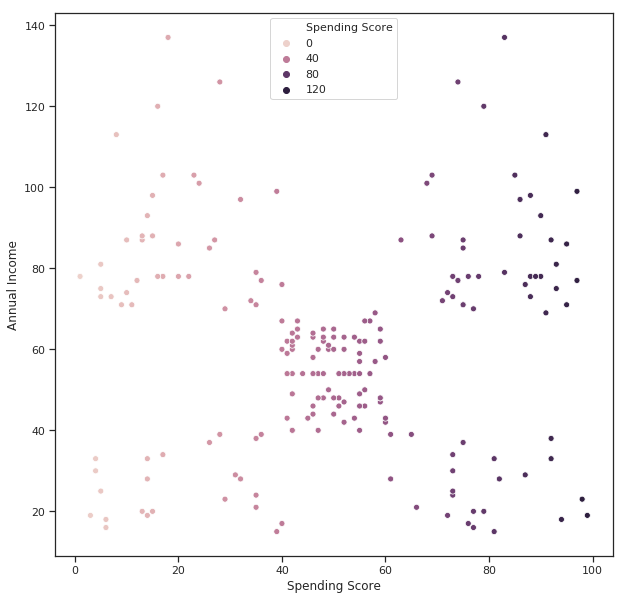

In [95]:
# Диаграмма рассеяния
figure, axes = plt.subplots(figsize=(10,10)) 
sns.scatterplot(axes=axes, x=customerScore, y=annualIncome, data=data, hue=customerScore)

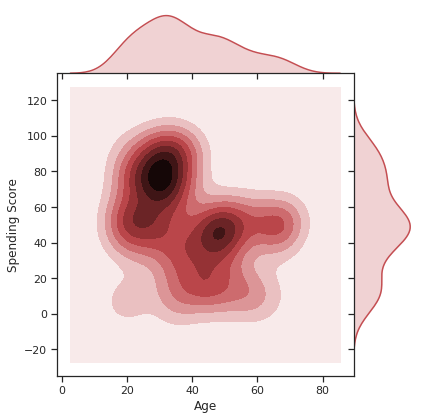

In [96]:
# Joint plot
sns.jointplot(x=age, y=customerScore, data=data, kind="kde", space=0, color="r")

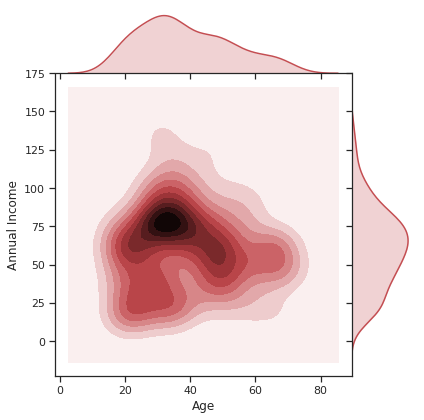

In [97]:
# Joint plot
sns.jointplot(x=age, y=annualIncome, data=data, kind="kde", space=0, color="r")

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


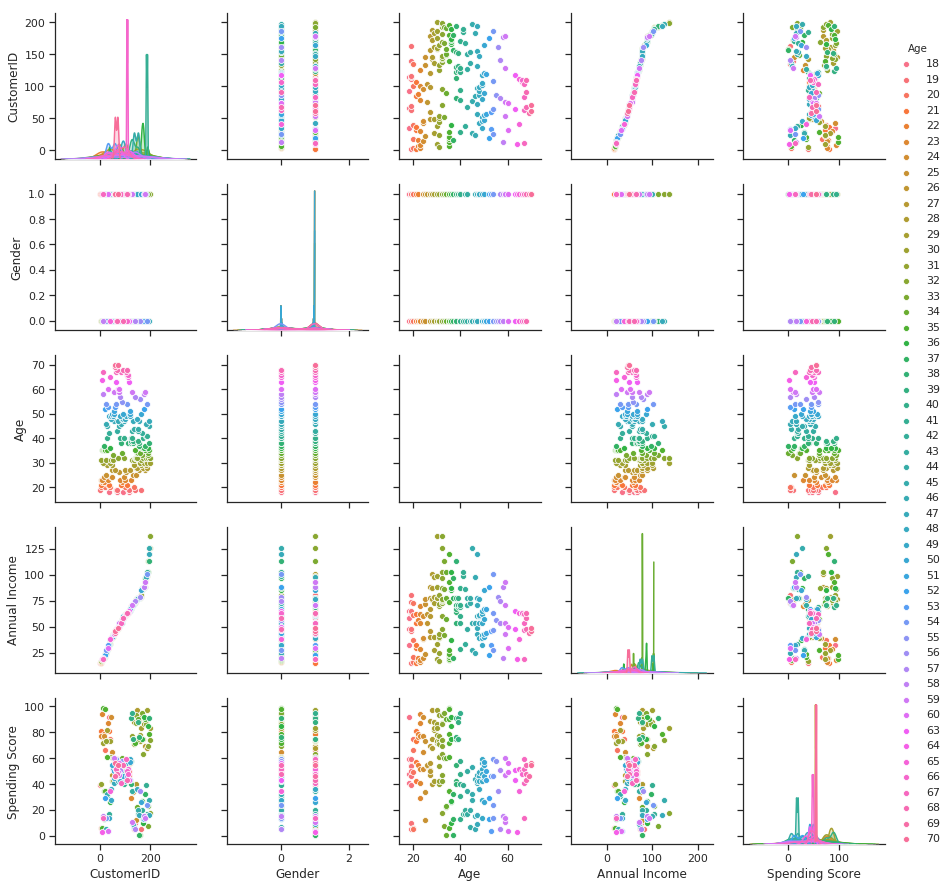

In [98]:
# Парные диаграммы
sns.pairplot(data, hue=age)

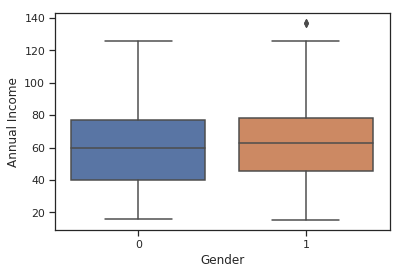

In [99]:
# Распределение параметра Gender сгруппированные по SpendingScore.
sns.boxplot(x=gender, y=annualIncome, data=data)

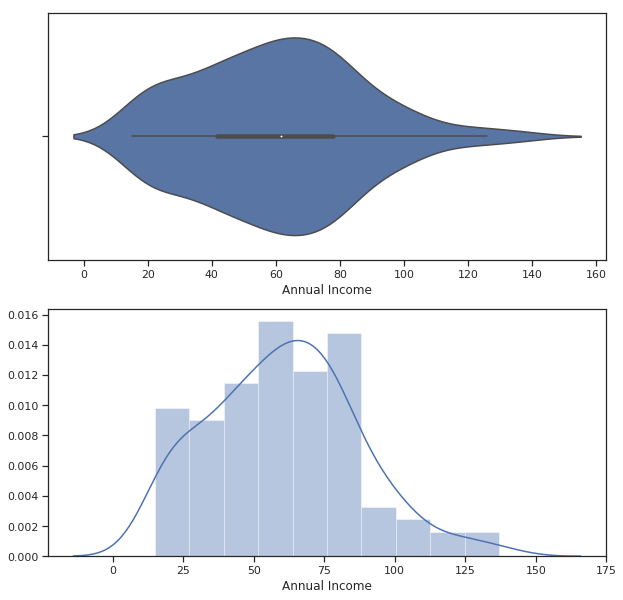

In [100]:
# Violin plot
figure, axes = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=axes[0], x=data[annualIncome])
sns.distplot(data[annualIncome], ax=axes[1])

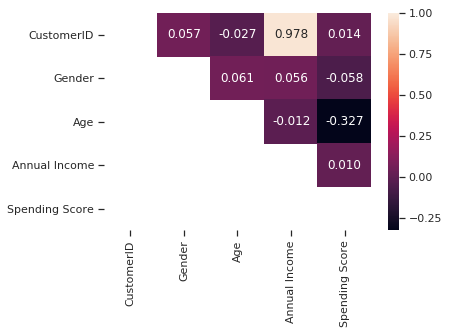

In [101]:
# Heat map
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

Из результатов анализа видно, данные слабо связанны друг с другом